### Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_appli=pd.read_csv('//Users//zoegong//Desktop//Capstone_Project_I//credit-card-approval-prediction//application_record.csv')
df_credit=pd.read_csv('//Users//zoegong//Desktop//Capstone_Project_I//credit-card-approval-prediction//credit_record.csv')

In [4]:
df=df_appli.merge(df_credit,how='outer',on='ID')  # merge two datasets together

In [5]:
df=df.drop_duplicates(subset=['ID'],keep='first')
df.dropna(0,inplace=True)
    

## Data Visualization

In [416]:
print('income type:',df.NAME_INCOME_TYPE.unique())
print('education type:',df.NAME_EDUCATION_TYPE.unique())
print('family status:',df.NAME_FAMILY_STATUS.unique())
print('housing type:',df.NAME_HOUSING_TYPE.unique())
print('occupation type:',df.OCCUPATION_TYPE.unique())
print('family size:',df.CNT_FAM_MEMBERS .unique())

income type: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
education type: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
family status: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
housing type: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
occupation type: ['Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
family size: [ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9.]


In [417]:
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].fillna(0)

In [418]:
# Transform some categorical variables into dummies

In [15]:
status_encode={'STATUS':{'C':'good','X':'good','0':'moderate','1':'moderate','2':'risky','3':'risky','4':'risky','5':'risky'}}

In [420]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [17]:
df.replace(status_encode,inplace=True)

In [422]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

## Draw Graph

#### Gender and risk relationship

In [423]:
good_status=df[df['STATUS']=='good']
mode_status=df[df['STATUS']=='moderate']
risk_status=df[df['STATUS']=='risky']


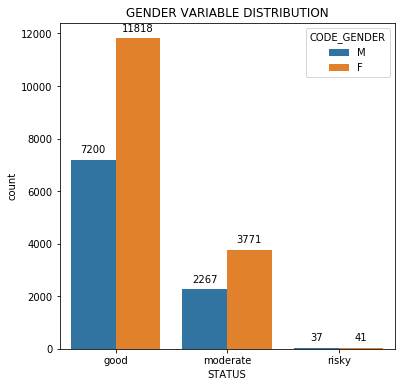

In [424]:
f,axes=plt.subplots(figsize=(6,6))
splot=sns.countplot(x='STATUS',hue='CODE_GENDER',data=df)
axes.set_title('GENDER VARIABLE DISTRIBUTION')

for p in splot.patches:
    splot.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

### Number of Children and risk relationship

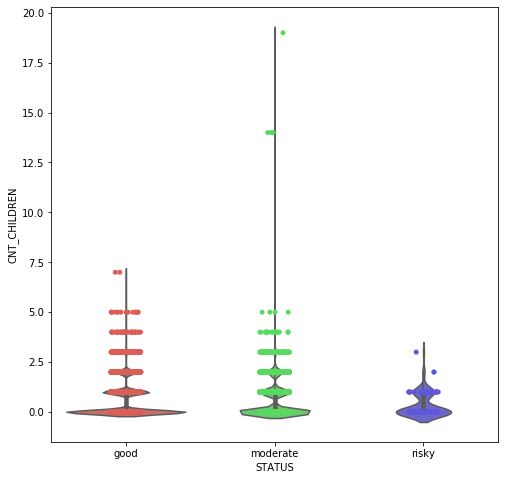

In [425]:
plt.figure(figsize=(8,8))
g1=sns.violinplot(x='STATUS',y='CNT_CHILDREN',data=df,palette='hls',split=True)
g1=sns.stripplot(x='STATUS',y='CNT_CHILDREN',data=df,palette='hls')

### risk and binomial variables relationship

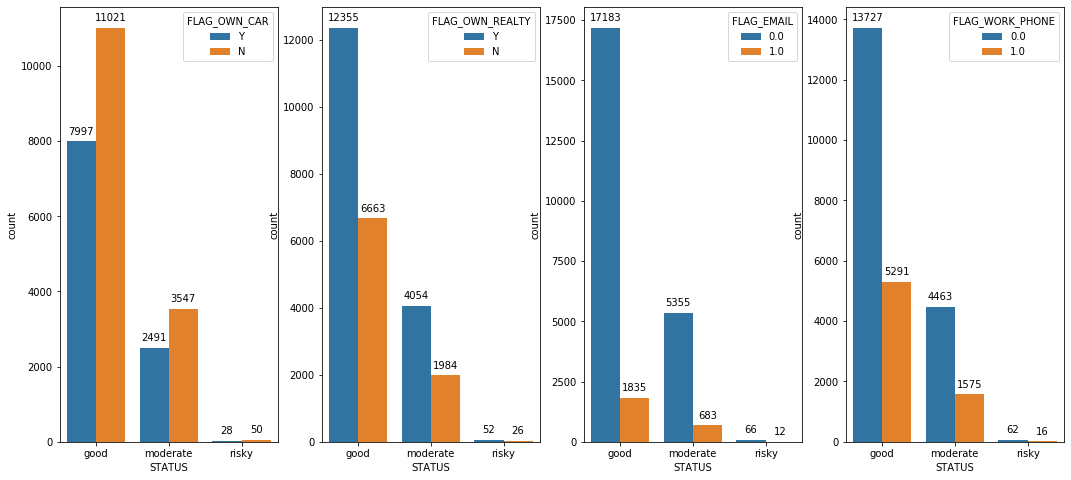

In [426]:
f,axes=plt.subplots(1,4, figsize=(18,8))
splot=sns.countplot(x='STATUS',hue='FLAG_OWN_CAR',data=df,ax=axes[0])
for p in splot.patches:
    splot.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')
    
splot1=sns.countplot(x='STATUS',hue='FLAG_OWN_REALTY',data=df,ax=axes[1])
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

splot2=sns.countplot(x='STATUS',hue='FLAG_EMAIL',data=df,ax=axes[2])
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

splot3=sns.countplot(x='STATUS',hue='FLAG_WORK_PHONE',data=df,ax=axes[3])
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext  = (0, 10), textcoords = 'offset points')      
    

## Own realty and risk relationship (seems like realty is the most important feature) 

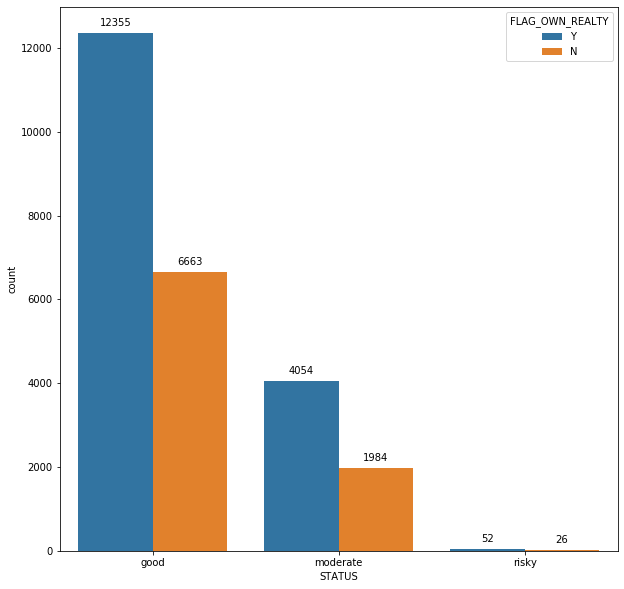

In [427]:
plt.figure(figsize=(10,10))
splot=sns.countplot(x='STATUS',hue='FLAG_OWN_REALTY',data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

In [428]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

### Number of Children/number of family members and Risk 

Text(0.5, 1.0, 'Family Size and Risk')

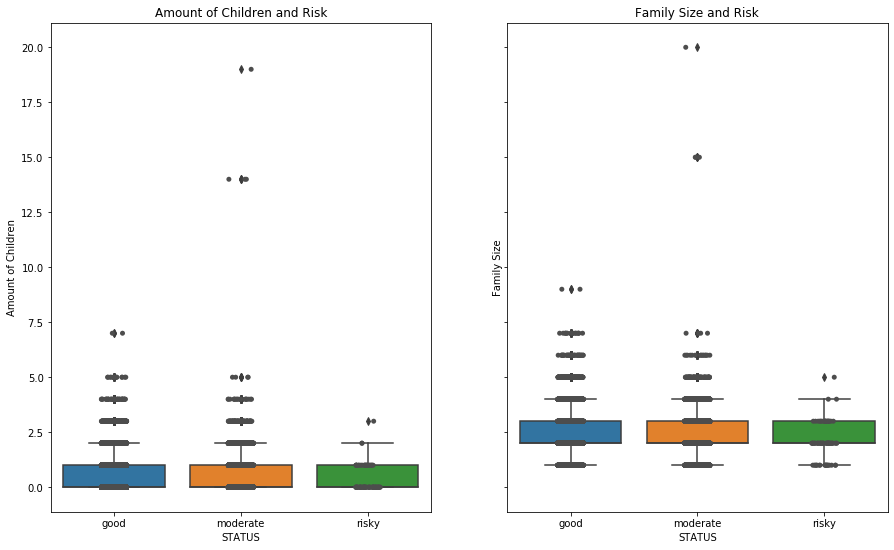

In [429]:
f,axes=plt.subplots(1,2,figsize=(15,9),sharey=True)
g2=sns.boxplot(x='STATUS',y='CNT_CHILDREN',data=df,ax=axes[0])
g4=sns.stripplot(x='STATUS',y='CNT_CHILDREN',data=df,color='.3',ax=axes[0])
g2.set_ylabel('Amount of Children')
g2.set_title('Amount of Children and Risk')
g3=sns.boxplot(x='STATUS',y='CNT_FAM_MEMBERS',data=df,ax=axes[1])
g5=sns.stripplot(x='STATUS',y='CNT_FAM_MEMBERS',data=df,color='.3',ax=axes[1])
g3.set_ylabel('Family Size')
g3.set_title('Family Size and Risk')


Text(0, 0.5, 'FAMILY SIZE')

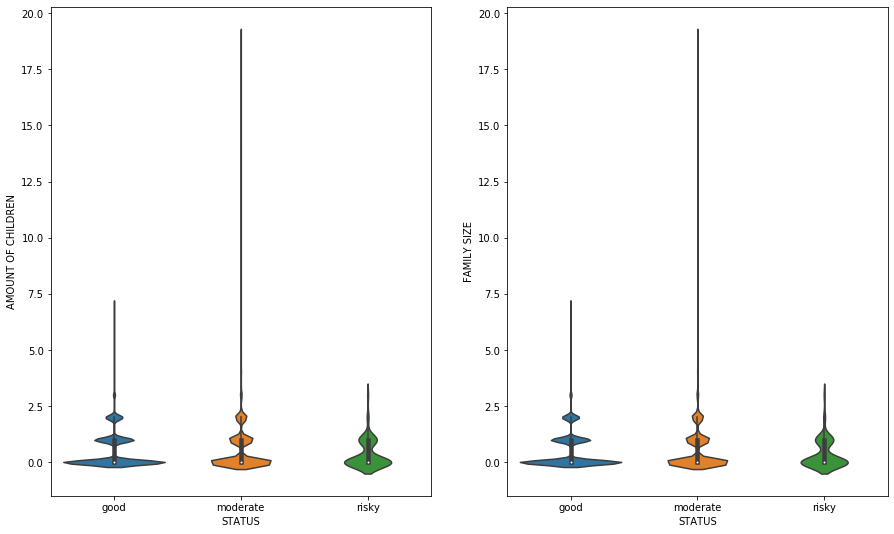

In [430]:
f,axes=plt.subplots(1,2,figsize=(15,9))
g3=sns.violinplot(y='CNT_CHILDREN',x='STATUS' ,data=df,ax=axes[0])
g3.set_ylabel('AMOUNT OF CHILDREN')

g4=sns.violinplot(y='CNT_CHILDREN',x='STATUS' ,data=df,ax=axes[1])
g4.set_ylabel('FAMILY SIZE')


### income type/amount and risk

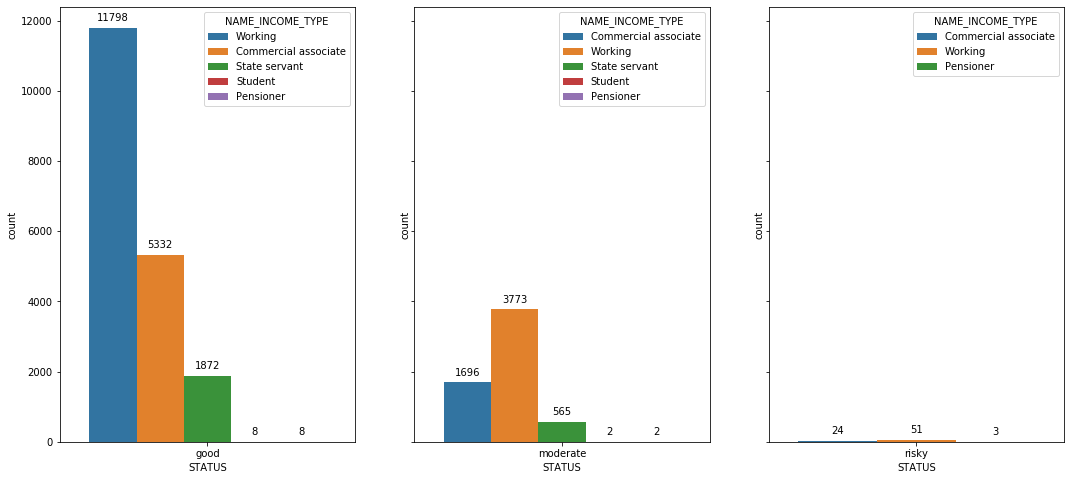

In [431]:
f, axes = plt.subplots(1, 3, figsize=(18,8), sharey=True)
splot1=sns.countplot(x='STATUS',hue='NAME_INCOME_TYPE',data=good_status, ax=axes[0])
splot2=sns.countplot(x='STATUS',hue='NAME_INCOME_TYPE',data=mode_status,ax=axes[1])
splot3=sns.countplot(x='STATUS',hue='NAME_INCOME_TYPE',data=risk_status,ax=axes[2])

for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

for p in splot2.patches:
    splot2.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')
    
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

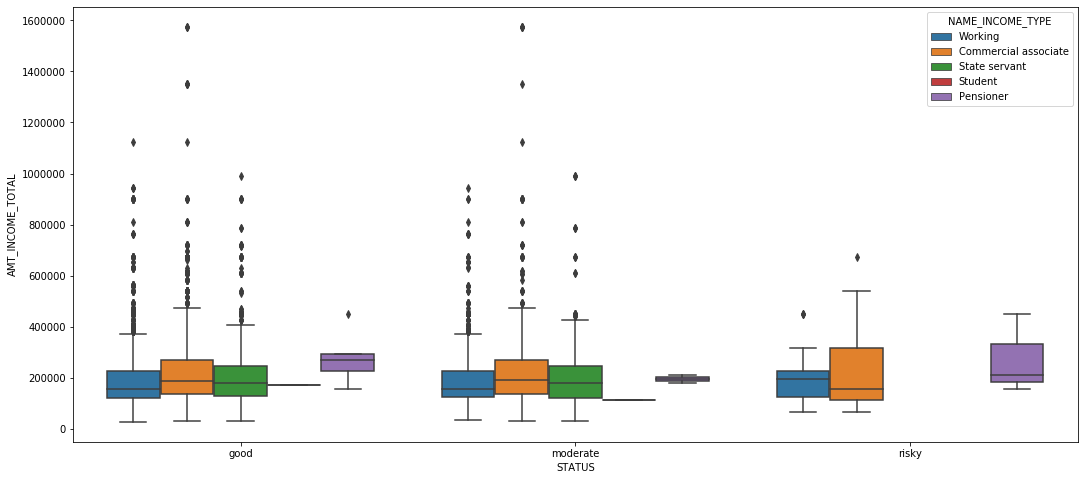

In [432]:
plt.figure(figsize=(18,8))
sns.boxplot(x='STATUS',y='AMT_INCOME_TOTAL',hue='NAME_INCOME_TYPE',data=df)


Text(0, 0.5, 'INCOME TOTAL')

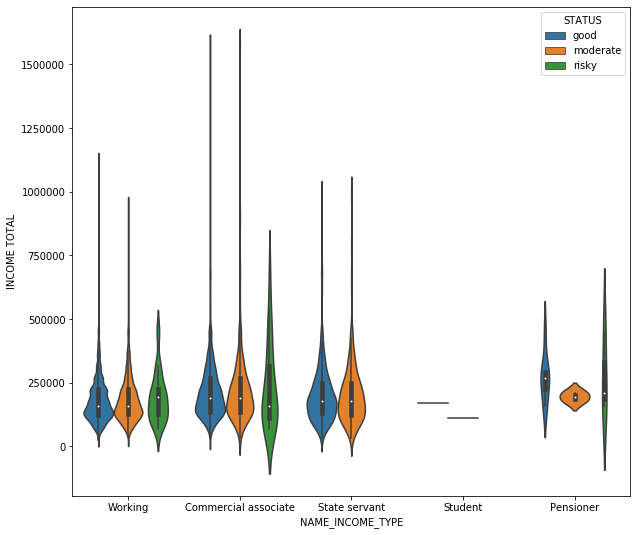

In [433]:
plt.figure(figsize=(10,9))
g=sns.violinplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue='STATUS',data=df)
g.set_ylabel('INCOME TOTAL')

### Education and Risk

In [434]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

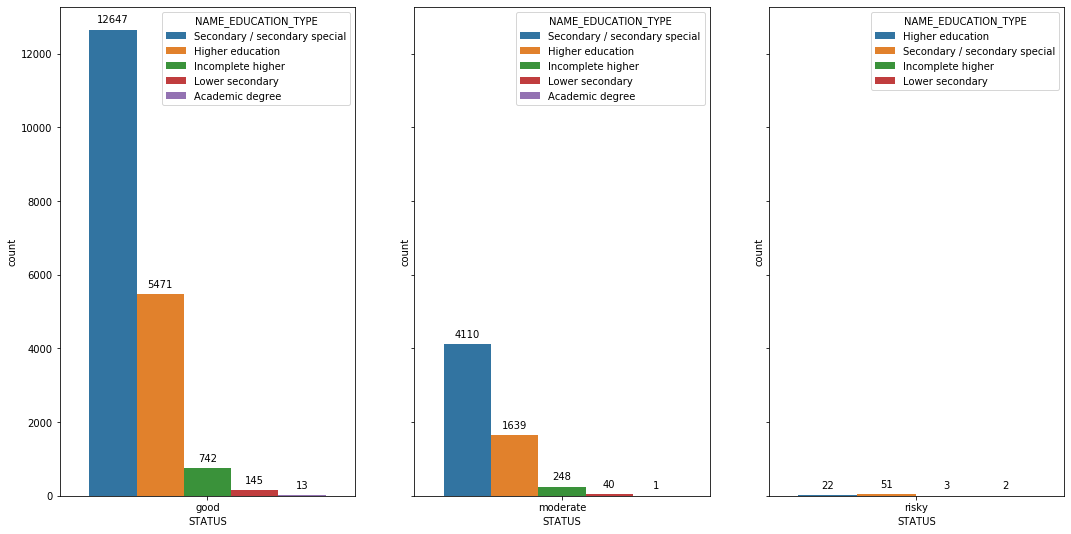

In [435]:
f,axes=plt.subplots(1,3,figsize=(18,9),sharey=True)
splot1=sns.countplot(x='STATUS',hue='NAME_EDUCATION_TYPE',data=good_status,ax=axes[0])
splot2=sns.countplot(x='STATUS',hue='NAME_EDUCATION_TYPE',data=mode_status,ax=axes[1])
splot3=sns.countplot(x='STATUS',hue='NAME_EDUCATION_TYPE',data=risk_status,ax=axes[2])

for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')   
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

#### HOUSING TYPE and Risk


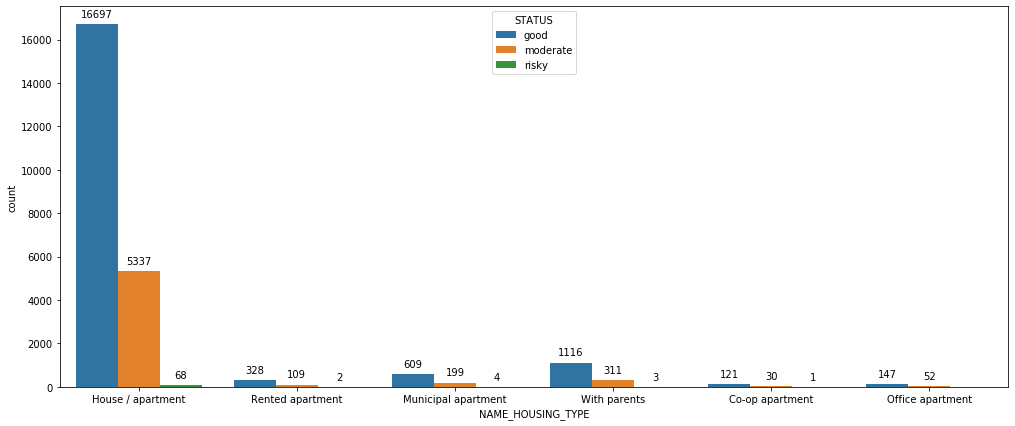

In [436]:
plt.figure(figsize=(17,7))
splot1=sns.countplot(x='NAME_HOUSING_TYPE',hue='STATUS',data=df)
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

In [437]:
# People who live in house/apartment are more inclined to pay credit card on time

#### NAME_FAMILY_STATUS

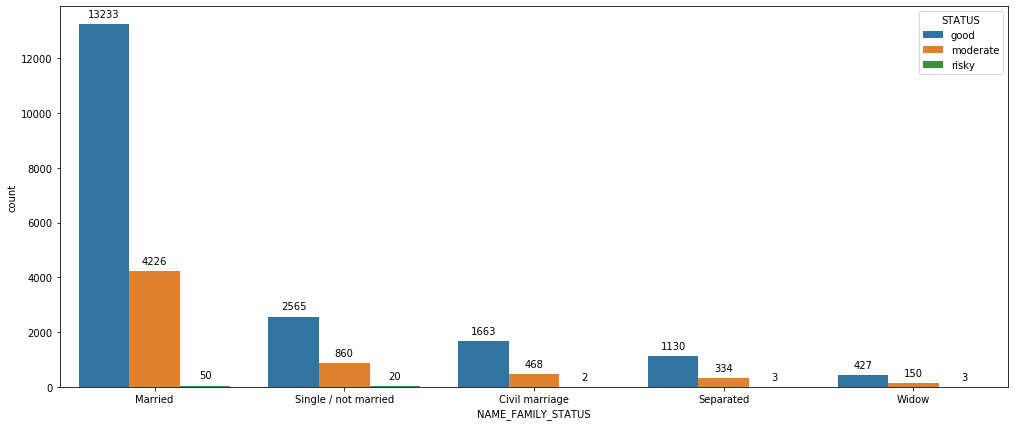

In [438]:
plt.figure(figsize=(17,7))
splot1=sns.countplot(x='NAME_FAMILY_STATUS',hue='STATUS',data=df)
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), 'g'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',xytext = (0, 10), textcoords = 'offset points')

### 'DAYS_BIRTH'

In [439]:
# convert days into years and see years as age

age=[]
for item in df['DAYS_BIRTH'].values:
    age_year=round(abs(item)/365)
    age.append(age_year)

age=np.array(age)
df['age_year']=age

In [440]:
# age for good credit:
good_age=df[df['STATUS']=='good']['age_year']
# age for moderate credit:
moderate_age=df[df['STATUS']=='moderate']['age_year']
# age for risky credit:
risky_age=df[df['STATUS']=='risky']['age_year']
x=df[df['STATUS']=='risky']['age_year']

Text(0.5, 1.0, 'RISKY CREDIT AGE DISTRIBUTION')

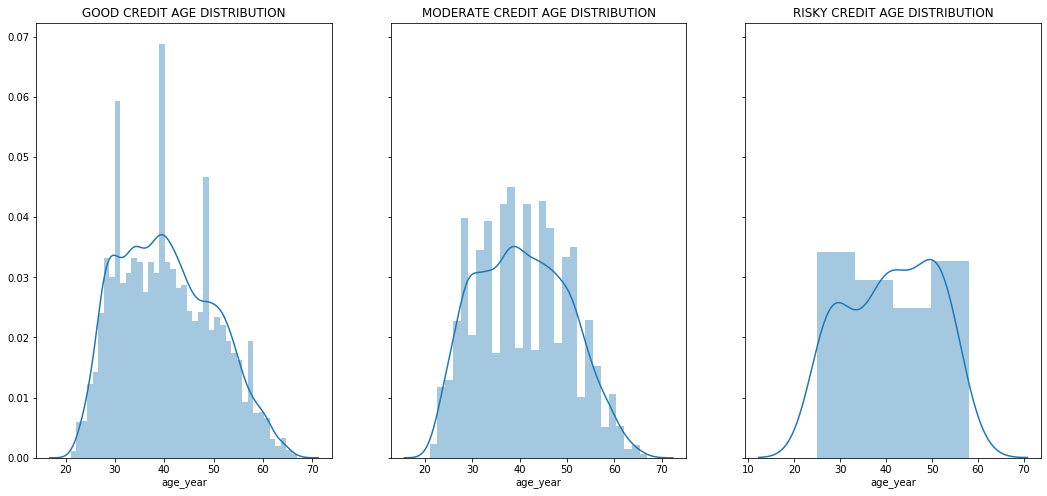

In [441]:
f,axes=plt.subplots(1,3,figsize=(18,8),sharey=True)
f1=sns.distplot(good_age,kde=True,rug=False,ax=axes[0])
f1.set_title('GOOD CREDIT AGE DISTRIBUTION')
f2=sns.distplot(moderate_age,kde=True,rug=False,ax=axes[1])
f2.set_title('MODERATE CREDIT AGE DISTRIBUTION')
f3=sns.distplot(risky_age,kde=True,rug=False,ax=axes[2])
f3.set_title('RISKY CREDIT AGE DISTRIBUTION')



In [442]:
# categorize age into several groups as young, adults, and seniors

#define age interval: 
bins=(19,25,50,80)
groups=['young','adults','seniors']

df['age_groups']=pd.cut(df.age_year,bins, labels=groups)


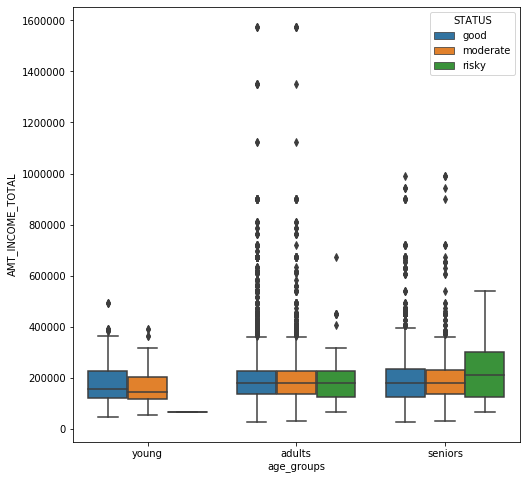

In [443]:
plt.figure(figsize=(8,8))
sns.boxplot(x='age_groups',y='AMT_INCOME_TOTAL',hue='STATUS',data=df)

In [444]:
## I am confused about the boxchart: for senior group: people who earn more has quite had credit history. They tend to overdue their pmt

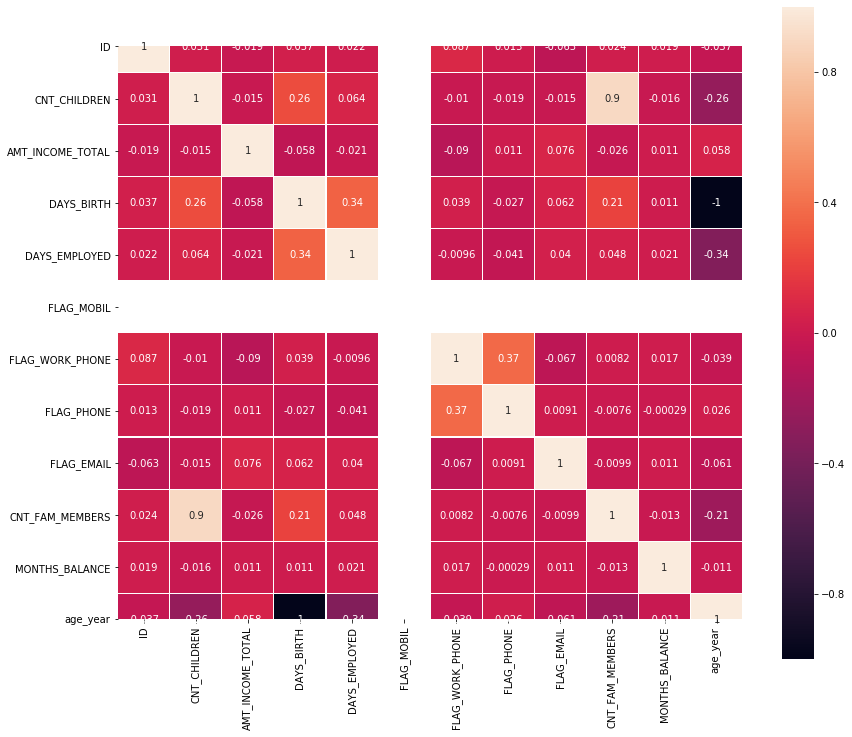

In [445]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()  #interesting dataset to look at, between number of children and family size could just pick one...Not really obvious multicollinearity problem identified. 

In [446]:
# we define that status for good and moderate payment history should approve credit card whereas risky no:
df['STATUS'].value_counts()

good        19018
moderate     6038
risky          78
Name: STATUS, dtype: int64

In [447]:
status_encode={'STATUS':{'good': '1','moderate':'0','risky':'0'}}

In [448]:
df.replace(status_encode,inplace=True)

In [449]:
df['STATUS'].value_counts()

1    19018
0     6116
Name: STATUS, dtype: int64

## Data Preprocessing and start to train dataset


In [450]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,classification_report, f1_score, roc_auc_score,classification_report,roc_curve,auc

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import plot_confusion_matrix

In [451]:
# split status good and moderate as 1 and risky as 0:

from sklearn.preprocessing import LabelEncoder

def categorical_var(columns):
    categ=[]
    for i in df.columns:
        if df[i].dtype==np.object:
            categ.append(i)
    return categ

In [452]:
catego_var=categorical_var(df.columns)
le=preprocessing.LabelEncoder()
for var in catego_var:
    le.fit(df[var].tolist())
    print(le.classes_)
    df[var]=le.fit_transform(df[var])
    print(le.fit_transform(df[var]))
    
# to check the inverse: ? le.inverse_transform()



['F' 'M']
[1 0 0 ... 0 0 1]
['N' 'Y']
[1 0 0 ... 0 0 0]
['N' 'Y']
[1 1 1 ... 1 1 1]
['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
[4 0 0 ... 1 4 4]
['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
[4 4 4 ... 1 4 4]
['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
[1 3 3 ... 1 1 3]
['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
[1 1 1 ... 1 1 4]
['Accountants' 'Cleaning staff' 'Cooking staff' 'Core staff' 'Drivers'
 'HR staff' 'High skill tech staff' 'IT staff' 'Laborers'
 'Low-skill Laborers' 'Managers' 'Medicine staff' 'Private service staff'
 'Realty agents' 'Sales staff' 'Secretaries' 'Security staff'
 'Waiters/barmen staff']
[16 14 14 ... 11 14  8]
['0' '1']
[1 0 1 ... 1 0 0]


In [453]:
#le=preprocessing.LabelEncoder()
#le.fit(['good','moderate','risky'])
#print(le.transform(['good','moderate','risky']))
#le.inverse_transform(df['STATUS'].unique().tolist())


Text(0.5, 1.0, 'Distribtution of STATUS')

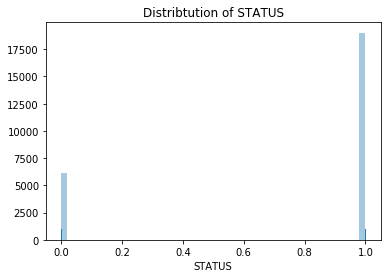

In [454]:
f1=sns.distplot(df['STATUS'],kde=False, rug=True)
f1.set_title('Distribtution of STATUS')

In [464]:
X=df.drop('STATUS',1)
X=np.array(X)

y=df['STATUS']
y=np.array(y)


In [456]:
# Split X and y into train and test version:


del df['ID']
del df['OCCUPATION_TYPE']
del df['CNT_FAM_MEMBERS']
del df['DAYS_EMPLOYED']
del df['DAYS_BIRTH']
del df['age_groups']
print('Good', round(df['STATUS'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Risky', round(df['STATUS'].value_counts()[0]/len(df) * 100,2), '% of the dataset')



Good 75.67 % of the dataset
Risky 24.33 % of the dataset


### Logistic Regression:



In [462]:
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3,random_state=30)
data=df.columns.values

# using Recursive Feature Selection to find the right variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


logreg=LogisticRegression()
logreg_model= logreg.fit(X_train,y_train)
y_pred=logreg_model.predict(X_test)
acc_log=accuracy_score(y_test,y_pred, normalize=True)
pre_log=precision_score(y_test,y_pred)
recall_log=recall_score(y_test,y_pred)
f1_log=f1_score(y_test,y_pred)
roc_log=roc_auc_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
    
    
print('Acuracy of logistic regression classifier on test:{:f}'.format(acc_log))
print("Precision of logistic regression classifier on test:{:f}".format(pre_log))
print("Recall of logistc regression classifier on test:{:f}".format(recall_log))
print("f1 score of logistic regression classifier on test:{:f}".format(f1_log))
print('ROC_AUC_score of logistic regression classifier on test:{:f}'.format(roc_log))
print('confusinon Matrix of logistic regression classifier on test:\n',
      (conf_matrix))
print('Classification Report:\n',classification_report(y_test, y_pred))


#precision (False Positive) would be more important under this case because accept someone who has no good record. 
# To reduce 1830

Acuracy of logistic regression classifier on test:0.757327
Precision of logistic regression classifier on test:0.757327
Recall of logistc regression classifier on test:1.000000
f1 score of logistic regression classifier on test:0.861908
ROC_AUC_score of logistic regression classifier on test:0.500000
confusinon Matrix of logistic regression classifier on test:
 [[   0 1830]
 [   0 5711]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1830
           1       0.76      1.00      0.86      5711

    accuracy                           0.76      7541
   macro avg       0.38      0.50      0.43      7541
weighted avg       0.57      0.76      0.65      7541



In [465]:
grid_values={'penalty':['l1','l2'],'C':np.linspace(0.001,10,100)}

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)
clf=LogisticRegression()
grid_clf_acc=RandomizedSearchCV(clf,grid_values,scoring='roc_auc',random_state=444)

grid_clf_acc.fit(X_train_std,y_train)

print('Best Parameter:',grid_clf_acc.best_params_)
print('Best Score:',grid_clf_acc.best_score_)


Best Parameter: {'penalty': 'l1', 'C': 1.92}
Best Score: 0.5843438526439892


In [466]:

clf_reg=grid_clf_acc.best_estimator_
#LogisticRegression(penalty=grid_clf_acc.best_params_['penalty'],C=grid_clf_acc.best_params_['C'],solver='liblinear')

clf_reg.fit(X_train_std,y_train)

clf_reg_y_pred=clf_reg.predict(X_test_std)
coef_reg = clf_reg.coef_

sparsity_reg=np.mean(coef_reg==0)


conf_m_reg=confusion_matrix(y_test,clf_reg_y_pred)
print('Sparsity:',sparsity_reg)
print('Confusion matrix:\n',conf_m_reg)
print(coef_reg)
print('Classification Report:\n',classification_report(y_test, clf_reg_y_pred))


Sparsity: 0.06666666666666667
Confusion matrix:
 [[   0 1830]
 [   0 5711]]
[[-0.0149121   0.03116071 -0.03387565 -0.03552828 -0.04736916 -0.01927694
  -0.04754921 -0.04050985  0.0227612   0.          0.02502856  0.00915027
  -0.04634057 -0.34278841 -0.00084107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1830
           1       0.76      1.00      0.86      5711

    accuracy                           0.76      7541
   macro avg       0.38      0.50      0.43      7541
weighted avg       0.57      0.76      0.65      7541



In [467]:
cm_reg = confusion_matrix(y_test,clf_reg_y_pred )
cm_reg

array([[   0, 1830],
       [   0, 5711]])

### SMOTE:

In [400]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.pipeline import make_pipeline


In [402]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2,sampling_strategy='minority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 13307
Before OverSampling, counts of label '0': 4286 

After OverSampling, the shape of train_X: (26614, 15)
After OverSampling, the shape of train_y: (26614,) 

After OverSampling, counts of label '1': 13307
After OverSampling, counts of label '0': 13307


In [403]:
#before tuning:
sm=SMOTE(random_state=29,ratio=1.0,sampling_strategy='minority')
X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)
smote=LogisticRegression(solver='liblinear').fit(X_train_res,y_train_res)
smote_pred=smote.predict(X_test)


conf_m_sm_b4=confusion_matrix(y_test,smote_pred)
accuracy_sm_b4=accuracy_score(y_test,smote_pred)
recall_sm_b4=recall_score(y_test,smote_pred)
precision_sm_b4=precision_score(y_test,smote_pred)
f1_sm_b4=f1_score(y_test,smote_pred)


print('Confusion Matrix before tunning:\n',conf_m_sm_b4)


Confusion Matrix before tunning:
 [[1556  274]
 [3974 1737]]


In [469]:

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

sss=StratifiedShuffleSplit(n_splits=10,test_size=0.5,random_state=2)
clf=LogisticRegression()
log_rand=RandomizedSearchCV(clf,grid_values,scoring='precision',n_iter=4)
sm=SMOTE(random_state=29,ratio=1.0)

# tuning during smote
for train_index, test_index in sss.split(X_train,y_train):
    pipeline=make_pipeline(SMOTE(sampling_strategy='minority'),log_rand)
    model=pipeline.fit(X_train[train_index],y_train[train_index])
    best_estimator=log_rand.best_estimator_
    
    y_pred_sm_cv=best_estimator.predict(X_train[test_index])
    
    
    accuracy_lst.append(accuracy_score(y_train[test_index],y_pred_sm_cv))
    precision_lst.append(precision_score(y_train[test_index],y_pred_sm_cv))
    recall_lst.append(recall_score(y_train[test_index],y_pred_sm_cv))
    f1_lst.append(f1_score(y_train[test_index],y_pred_sm_cv))
    
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
#print('confusion matrix',confusion_matrix(y_test,y_pred_sm_cv))
print('--'*45)

#prediction for the accuracy and precision without taking the average:
y_pred_sm=log_rand.best_estimator_.predict(X_test)

print('accucay: {}'.format(log_rand.best_estimator_.score(X_test,y_test)))
print('precision:{}'.format(precision_score(y_test,y_pred_sm)))
print('recall measure:',recall_score(y_test,y_pred_sm))
print('f1:{}'.format(f1_score(y_test,y_pred_sm)))
print('**'*45)
print('**'*45)
print('Comparison Between SMOTE before and After GridSearchCV:')
print('Accuracy Before:{}\nAccuracy after:{}'.format(accuracy_sm_b4, accuracy_score(y_test,y_pred_sm)))
print('-'*45)
print('Precision Before:{}\nPrecision after:{}'.format(precision_sm_b4, precision_score(y_test,y_pred_sm)))
print('-'*45)
print('Recall Before:{}\nRecall after:{}'.format(recall_sm_b4, recall_score(y_test,y_pred_sm)))
print('-'*45)
print('f1 Before:{}\nf1 after:{}'.format(f1_sm_b4, f1_score(y_test,y_pred_sm)))
print('-'*45)



accuracy: 0.44342389450949193
precision: 0.852414920150761
recall: 0.32043883378418997
f1: 0.46426683286592985
------------------------------------------------------------------------------------------
accucay: 0.4757989656544225
precision:0.8262806236080178
recall measure: 0.3897741201190685
f1:0.5296847114812612
******************************************************************************************
******************************************************************************************
Comparison Between SMOTE before and After GridSearchCV:
Accuracy Before:0.4366794854793794
Accuracy after:0.4757989656544225
---------------------------------------------
Precision Before:0.8637493784186971
Precision after:0.8262806236080178
---------------------------------------------
Recall Before:0.30414988618455613
Recall after:0.3897741201190685
---------------------------------------------
f1 Before:0.44988344988344986
f1 after:0.5296847114812612
--------------------------------------------

### Random Forest:

In [476]:
#base model:

rf=RandomForestClassifier(n_estimators=20,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
errors_rf=abs(y_pred_rf-y_test)
acc_rf=accuracy_score(y_test,y_pred_rf, normalize=True)
prec_rf=precision_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
f1_rf=f1_score(y_test,y_pred_rf)
roc_rf=roc_auc_score(y_test,y_pred_rf)
cm_rf=confusion_matrix(y_test,y_pred_rf)






In [483]:
# Hyperparameter Tuning:

n_estimators=np.linspace(1,40,10)
param_grid = { 
    'n_estimators': [int(x) for x in n_estimators],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf_CV=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10)
rf_CV.fit(X_train,y_train)
rf1=rf_CV.best_estimator_

rf1.fit(X_train,y_train)
y_pred_rf_cv=rf1.predict(X_test)
errors_rf_cv=abs(y_pred_rf_cv-y_test)
acc_rf_cv=accuracy_score(y_test,y_pred_rf_cv)
precision_rf_cv=precision_score(y_test,y_pred_rf_cv)
recall_rf_cv=recall_score(y_test,y_pred_rf_cv)
f1_rf_cv=f1_score(y_test,y_pred_rf_cv)
roc_rf_cv=roc_auc_score(y_test,y_pred_rf_cv)
cm_rf_cv=confusion_matrix(y_test,y_pred_rf_cv)

In [480]:
print('Mean Absolute Error baseline: {:f}\nMean Absolute Error after:{:f}'.format(np.mean(errors_rf),np.mean(errors_rf_cv)))
print('')
print('Acuracy of RF classifier baseline:{:f}\nAcuracy of RF classifier after:{:f}'.format(acc_rf,acc_rf_cv))
print('')
print('Precision of RF classifier baseline:{:f}\nPrecesion of RF classifier after:{:f}'.format(prec_rf,precision_rf_cv))
print('')
print('Recall of RF classifier baseline:{:f}\nRecall of RF classifier after:{:f}'.format(recall_rf,recall_rf_cv))
print('')
print('f1 score of RF classifier baseline:{:f}\nf1 score of RF classifier after:{:f}'.format(f1_rf,f1_rf_cv))
print('')
print('AUC-ROC score of RF classifier baseline:{:f}\nAUC_ROc score of RF classifier after:{:f}'.format(roc_rf,roc_rf_cv))
print('')
print('Improvement of accuracy {:0.4f}%'.format(((acc_rf_cv-acc_rf)/acc_rf)*100))

Mean Absolute Error baseline: 0.260178
Mean Absolute Error after:0.242276

Acuracy of RF classifier baseline:0.739822
Acuracy of RF classifier after:0.757724

Precision of RF classifier baseline:0.796457
Precesion of RF classifier after:0.757902

Recall of RF classifier baseline:0.881807
Recall of RF classifier after:0.999300

f1 score of RF classifier baseline:0.836962
f1 score of RF classifier after:0.862019

AUC-ROC score of RF classifier baseline:0.589264
AUC_ROc score of RF classifier after:0.501562

Improvement of accuracy 2.4198%


### LightGBM:


In [477]:
roc_rf

0.589264175261431

In [283]:
import lightgbm as lgb

In [356]:
# split the dataset
X=df.drop('STATUS',1)
y=df['STATUS']
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=30)

#create dataset for lightGBM:
lgb_train=lgb.Dataset(X_train,y_train)
lgb_test=lgb.Dataset(X_test,y_test)



In [355]:
grid.best_params_
grid.best_score_

0.7568351048712556

In [335]:
params={
    'boosting_type':'gbdt',
    'max_depth':-1,
    'objective':'binary',
    'nthread':5,
    'num_leaves':64,
    'learning_rate':0.08,
    'max_bin':512,
    'subsample_for_bin':200,
    'subsample':1,
    'subsample_freq': 1,
    'colsample_bytree': 0.8,
    'reg_alpha': 1.2,
    'reg_lambda': 1.2,
    'min_split_gain': 0.5,
    'min_child_weight': 1,
    'min_child_samples': 5,
    'scale_pos_weight': 1,
    'num_class' : 1,
    'metric' : 'binary_error'
          
}

In [337]:
gridParams = {
    'learning_rate': [0.07,0.08,0.1,0.3,0.5],
    'n_estimators': [7,8,10,15,20],
    'num_leaves': [8,20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1, 1.2],
    'reg_lambda' : [ 1.2, 1.4],
    'max_depth':[-1,4,7]
    }

In [338]:
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, n_jobs=-1)

In [340]:
grid.fit(X_train,y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 766 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 1423 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 1868 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2395 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3002 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3691 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4460 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5311 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6242 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 7255 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 8348 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 9523 tasks      |

{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.3, 'max_depth': -1, 'n_estimators': 20, 'num_leaves': 27, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1.2, 'subsample': 0.75}
0.7568351048712556


In [367]:
lgbm = lgb.train(grid.best_params_,
                 lgb_train,
                 28,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
y_pred_lgbm_prob = lgbm.predict(X_test)
y_pred_lgbm_01= np.where( y_pred_lgbm_prob > 0.5, 1, 0)

acc_lgm=accuracy_score(y_test,y_pred_lgbm_01)
precision_lgm=precision_score(y_test,y_pred_lgbm_01)
recall_lgm=recall_score(y_test,y_pred_lgbm_01)
f1_lgm=f1_score(y_test,y_pred_lgbm_01)
roc_lgm=roc_auc_score(y_test,y_pred_lgbm_prob)
cm_lgm=confusion_matrix(y_test,y_pred_lgbm_01)


### Comparison Between the models:

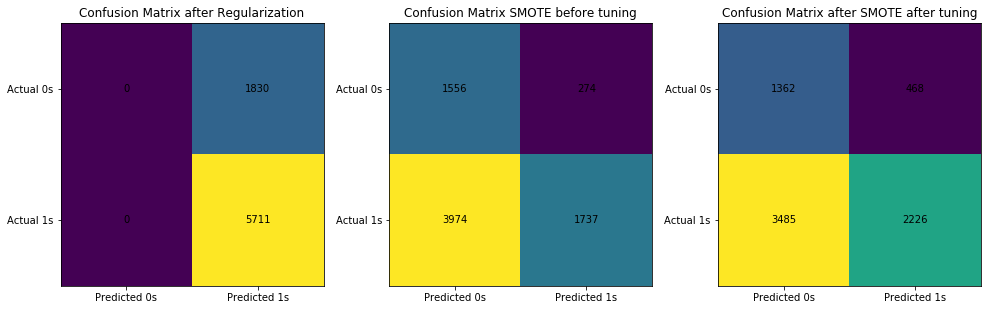

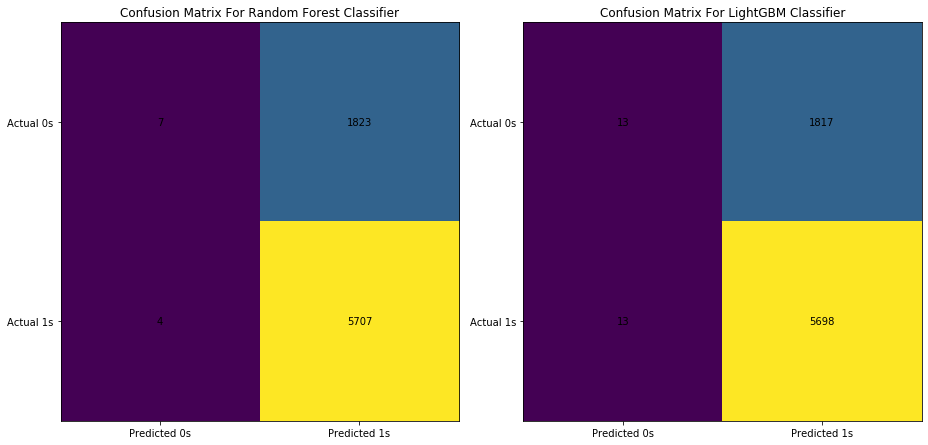

In [487]:
#confusion_matrix_plot:
cm_after = confusion_matrix(y_test,y_pred_sm)

fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(14, 14))

ax1.imshow(cm_reg)
ax1.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax1.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax1.set_ylim(1.5, -0.5)
ax1.set_title('Confusion Matrix after Regularization')
for i in range(2):
    for j in range(2):
        ax1.text(j, i, cm_reg[i, j], ha='center', va='center', color='black')


ax2.imshow(conf_m_sm_b4)

ax2.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax2.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax2.set_ylim(1.5, -0.5)
ax2.set_title('Confusion Matrix SMOTE before tuning')
for i in range(2):
    for j in range(2):
        ax2.text(j, i, conf_m_sm_b4[i, j], ha='center', va='center', color='black')


ax3.imshow(cm_after)

ax3.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax3.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax3.set_ylim(1.5, -0.5)
ax3.set_title('Confusion Matrix after SMOTE after tuning')
for i in range(2):
    for j in range(2):
        ax3.text(j, i, cm_after[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()
        
        
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 13))        
ax1.imshow(cm_rf_cv)
ax1.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax1.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax1.set_ylim(1.5, -0.5)
ax1.set_title('Confusion Matrix For Random Forest Classifier')
for i in range(2):
    for j in range(2):
        ax1.text(j, i, cm_rf_cv[i, j], ha='center', va='center', color='black')

ax2.imshow(cm_lgm)
ax2.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax2.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax2.set_ylim(1.5, -0.5)
ax2.set_title('Confusion Matrix For LightGBM Classifier')
for i in range(2):
    for j in range(2):
        ax2.text(j, i, cm_lgm[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()



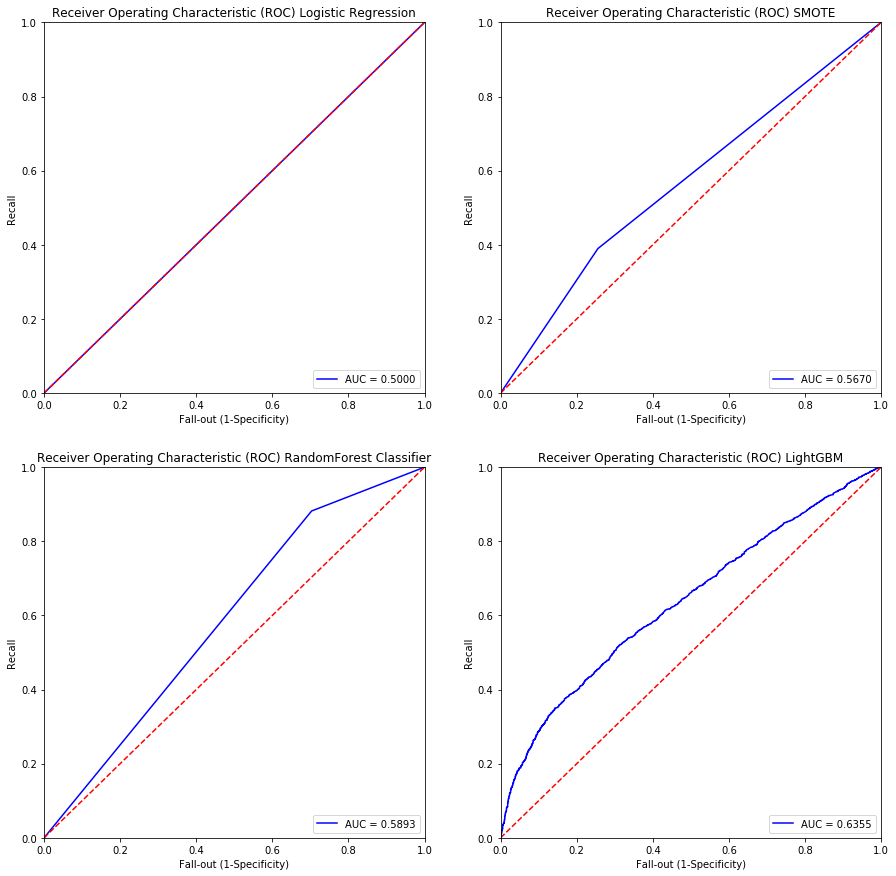

In [510]:
# AUC_ROC curve:
fig, ax = plt.subplots(2,2,figsize=(15,15 ))

false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, recall)
ax[0,0].set_title('Receiver Operating Characteristic (ROC) Logistic Regression')

ax[0,0].plot(false_positive_rate, recall, 'b', label = 'AUC = %0.4f' %roc_auc)
ax[0,0].legend(loc='lower right')
ax[0,0].plot([0,1], [0,1], 'r--')
ax[0,0].set_xlim([0.0,1.0])
ax[0,0].set_ylim([0.0,1.0])
ax[0,0].set_ylabel('Recall')
ax[0,0].set_xlabel('Fall-out (1-Specificity)')


false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_sm)
roc_auc = auc(false_positive_rate, recall)
ax[0,1].set_title('Receiver Operating Characteristic (ROC) SMOTE')

ax[0,1].plot(false_positive_rate, recall, 'b', label = 'AUC = %0.4f' %roc_auc)
ax[0,1].legend(loc='lower right')
ax[0,1].plot([0,1], [0,1], 'r--')
ax[0,1].set_xlim([0.0,1.0])
ax[0,1].set_ylim([0.0,1.0])
ax[0,1].set_ylabel('Recall')
ax[0,1].set_xlabel('Fall-out (1-Specificity)')

false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, recall)
ax[1,0].set_title('Receiver Operating Characteristic (ROC) RandomForest Classifier')

ax[1,0].plot(false_positive_rate, recall, 'b', label = 'AUC = %0.4f' %roc_auc)
ax[1,0].legend(loc='lower right')
ax[1,0].plot([0,1], [0,1], 'r--')
ax[1,0].set_xlim([0.0,1.0])
ax[1,0].set_ylim([0.0,1.0])
ax[1,0].set_ylabel('Recall')
ax[1,0].set_xlabel('Fall-out (1-Specificity)')

false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_lgbm)
roc_auc = auc(false_positive_rate, recall)
ax[1,1].set_title('Receiver Operating Characteristic (ROC) LightGBM')

ax[1,1].plot(false_positive_rate, recall, 'b', label = 'AUC = %0.4f' %roc_auc)
ax[1,1].legend(loc='lower right')
ax[1,1].plot([0,1], [0,1], 'r--')
ax[1,1].set_xlim([0.0,1.0])
ax[1,1].set_ylim([0.0,1.0])
ax[1,1].set_ylabel('Recall')
ax[1,1].set_xlabel('Fall-out (1-Specificity)')


plt.show()



In [ ]:
# Feature Importance:


In [489]:
results=[]
names=[]

models=[]

models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))



for name, model in models:
    kfold=KFold(n_splits=14)
    cv_result=cross_val_score(model, X_train, y_train, cv=kfold,scoring='f1')
    results.append(cv_result)
    names.append(name)
    info="%s accuracy: %f (%f)" %(name, cv_result.mean(),cv_result.std())
    print(info)
    

LR accuracy: 0.861244 (0.007604)
RF accuracy: 0.833836 (0.011308)
XGB accuracy: 0.860886 (0.007748)


In [503]:
y_pred_sm_cv

array([0, 1, 0, ..., 1, 1, 0])

In [506]:
accuracy_score(y_test,y_pred_sm)

0.4757989656544225

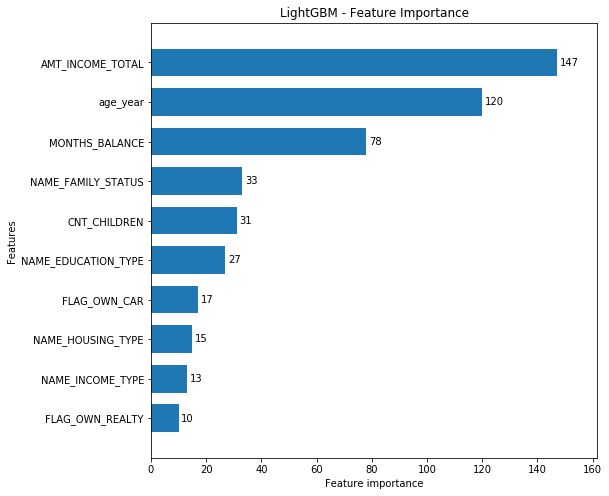

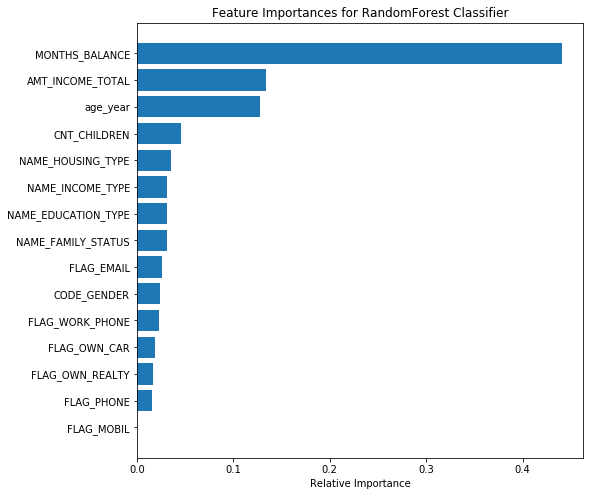

In [534]:
### feature importance
fig, ax = plt.subplots(figsize=(8,8))
lgb.plot_importance(lgbm, max_num_features=10,height=0.7, ax=ax)
ax.grid(False)
ax.set_title("LightGBM - Feature Importance")
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
importance_rf=rf1.feature_importances_
indices=np.argsort(importance_rf)
feature_names=df.drop('STATUS',1).columns.values

plt.title('Feature Importances for RandomForest Classifier')
plt.barh(range(len(indices)), importance_rf[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


